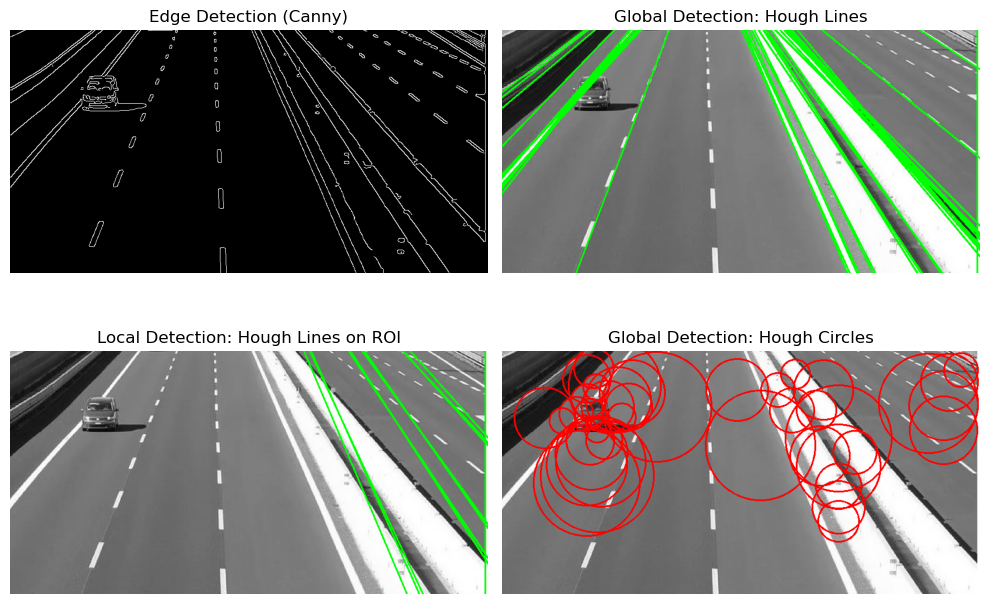

In [12]:
"""
Explanation:
Step 1: Apply Gaussian blur to reduce noise.
Step 2: Apply Canny edge detection.
Step 3: Apply the Hough Line Transform for global detection (entire image).
Step 4: Apply the Hough Line Transform to a region of interest (ROI).
Step 5: Display the results of global and local detection side-by-side for comparison.
Step 6: Apply Hough Circle Transform for global circle detection and display the result.

Visual Layout:
- Edge Detection (Canny edges)
- Global Line Detection (Hough Lines)
- Local Line Detection (Hough Lines on ROI)
- Global Circle Detection (Hough Circles)

Each output is displayed in a grid using matplotlib's subplot feature to allow comparison. The plt.tight_layout() ensures that there is no overlap in the plots.

This code will display the edge-detected image, the global line detection, local line detection, and the circle detection images sequentially within the same figure for easy comparison.
"""
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'hough_transform_road.png')  # Construct the full path to the image

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

# Step 1: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Apply Canny Edge Detection to highlight edges
edges = cv2.Canny(blurred_image, 50, 150)

# Step 3: Perform Global Detection (Hough Line Transform)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Step 4: Perform Local Detection (Hough Line Transform on ROI)
height, width = edges.shape
roi = edges[int(height / 2):, :]  # Bottom half of the image
lines_local = cv2.HoughLines(roi, 1, np.pi / 180, 100)
image_with_lines_local = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines_local is not None:
    for line in lines_local:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines_local, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Step 5: Compare Local vs Global (display comparisons)
# Display Global Detection (Hough Lines)
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(image_with_lines)
plt.title("Global Detection: Hough Lines")
plt.axis("off")

# Display Local Detection (Hough Lines on ROI)
plt.subplot(3, 2, 3)
plt.imshow(image_with_lines_local)
plt.title("Local Detection: Hough Lines on ROI")
plt.axis("off")

# Step 6: Experiment with Circle Detection (global)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100)
image_with_circles = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(image_with_circles, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)

# Display Global Circle Detection
plt.subplot(3, 2, 4)
plt.imshow(image_with_circles)
plt.title("Global Detection: Hough Circles")
plt.axis("off")

plt.tight_layout()
plt.show()
